In [7]:
import os 
import math
from datetime import timedelta
import seaborn as sns
import datetime
import pandas as pd
import numpy as np
from tqdm import tqdm 
from Modele_Lasso_IC import previsions_Lasso
os.getcwd()
dir_path= "/Users/h2jw/Documents/GitHub/StatApp_2020/"
os.chdir(dir_path)

In [8]:
!ls

Bibliographie       Modélisation        README.md
Data                Preparation reunion Visualisation


In [38]:
dateDebMod = pd.to_datetime("2008-01-01")
dateFinMod = pd.to_datetime("2015-12-31")

path = "/Users/h2jw/Documents/GitHub/StatApp_2020/"
#horizonsPrev = [7, 31+29+31, 365]  # (en jours) [365] 
ic = 0.95   # Seuil de l'intervalle de confiance souhaité
            



if __name__ == '__main__':
    
    database = pd.read_csv("/Users/h2jw/Downloads/database_sieges.csv",low_memory=False,decimal=',')
    database = database.astype({'Date': 'datetime64[ns]','PAX_FQM':'float','Sièges Corrections_ICI':'float','Coeff_Rempl':'float','Coeff_Rempl_FQM':'float'})
    database = database.groupby(['Date','Faisceau','ArrDep']).agg({'PAX':'sum','PAX_FQM':'sum','Sièges Corrections_ICI':'sum','Coeff_Rempl':'mean','Coeff_Rempl_FQM':'mean'}).reset_index()

    Calendrier = pd.read_csv(path+"Data/Calendrier/Calendrier.csv", dayfirst = True , sep = ';' , parse_dates = ['Date'])

    histoMod = database[(database['Date']>=dateDebMod) & (database['Date']<=dateFinMod)]
    # histoMod.to_csv("HistoMod.csv")
    

    hPrev=91

    # on va ajouter les prévisions à l'historique précédent + sur la période de prévisions
    histoPrev = database[(database['Date']>=dateDebMod) & (database['Date']<=dateFinMod+timedelta(days = hPrev))]
        # ( sans historique précédent : histoPrev = database[(database['Date']>dateFinMod) & (database['Date']<=dateFinMod+timedelta(days = hPrev))]   )

    Prev_Lasso = pd.DataFrame()


    for faisceau in ['National', 'Schengen', 'Autre UE', 'International', 'Dom Tom'] :
        for mvt in ['Départ']: #, 'Arrivée']: 

            histoMod_2 = histoMod[(histoMod['Faisceau']==faisceau) & (histoMod['ArrDep']==mvt)]

           # Modèle Lasso : 
            prev_Lasso = previsions_Lasso (histoMod_2, Calendrier, dateDebMod, dateFinMod, hPrev, ic)
            Prev_Lasso = pd.concat([Prev_Lasso,prev_Lasso],ignore_index=True)


    # Ajout des prévisions des différents modèles à histoPrev           
    histoPrev = pd.concat([histoPrev.set_index(['Date','Faisceau','ArrDep']),
                           Prev_Lasso.set_index(['Date','Faisceau','ArrDep'])],axis=1)
    histoPrev = histoPrev.reset_index()

    histoPrev.to_csv("Previsions_Lasso"+str(hPrev)+"j.csv")



  1%|          | 6/1000 [00:33<1:32:06,  5.56s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4951063.4946632385, tolerance: 4029852.2275170153
  model = cd_fast.enet_coordinate_descent(
  8%|▊         | 78/1000 [06:27<1:10:30,  4.59s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3746153.9369831085, tolerance: 3099765.9782182286
  model = cd_fast.enet_coordinate_descent_gram(
  9%|▉         | 94/1000 [07:48<1:05:52,  4.36s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 594592

 44%|████▎     | 436/1000 [31:49<34:11,  3.64s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3630999.22928524, tolerance: 3186115.6992955054
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5854942.921602249, tolerance: 3962972.8435028414
  model = cd_fast.enet_coordinate_descent(
 45%|████▌     | 454/1000 [32:48<32:24,  3.56s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4324699.281803131, tolerance: 3967198.479956933
  model = cd_

 36%|███▌      | 361/1000 [10:51<16:09,  1.52s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2364257.99860096, tolerance: 2131620.9379811217
  model = cd_fast.enet_coordinate_descent_gram(
 44%|████▍     | 445/1000 [13:08<15:11,  1.64s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2791847.253624916, tolerance: 2130297.045733362
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3706928.4230651855, tolerance: 2197561.9348929795
  model

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20710.509143292904, tolerance: 20308.630035945105
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21557.483839273453, tolerance: 20308.630035945105
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23250.218716442585, tolerance: 20419.40208401948
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sk

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25458.126297295094, tolerance: 20745.639987073926
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27558.497759997845, tolerance: 20745.639987073926
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26342.951953202486, tolerance: 20745.639987073926
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/s

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32001.640348523855, tolerance: 21544.477393407084
  model = cd_fast.enet_coordinate_descent_gram(
  2%|▏         | 15/1000 [00:56<57:31,  3.50s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57187.66045719385, tolerance: 21339.957674457724
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54374.0094884038, tolerance: 21312.667635856575
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25242.2571978271, tolerance: 21167.28165858407
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26166.11106646061, tolerance: 21167.28165858407
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25681.557514488697, tolerance: 21167.28165858407
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29192.093333035707, tolerance: 21828.700995176994
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28818.032114177942, tolerance: 21828.700995176994
  model = cd_fast.enet_coordinate_descent_gram(
  2%|▏         | 23/1000 [01:29<1:10:43,  4.34s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39948.7970263958, tolerance: 22171.983956175303
  model = cd_fast.enet_coordinate_descent_gram(
/Users

  3%|▎         | 28/1000 [01:48<1:00:52,  3.76s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43868.015654832125, tolerance: 21339.5527727313
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50026.75241160393, tolerance: 21339.5527727313
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50054.39550065994, tolerance: 21339.5527727313
  model = cd_fast.enet_coordinate_descent_gram(
  3%|▎      

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47139.156802773476, tolerance: 20503.51104231961
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56267.532946676016, tolerance: 20503.51104231961
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56256.47639158368, tolerance: 20503.51104231961
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23922.52898171544, tolerance: 21193.777129437804
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32397.757351577282, tolerance: 20654.63157783186
  model = cd_fast.enet_coordinate_descent_gram(
  4%|▎         | 37/1000 [02:24<1:03:48,  3.98s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22806.518506258726, tolerance: 20437.731667729087
  model = cd_fast.enet_coordinate_descent_gram(
/Users

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51822.98049759865, tolerance: 20415.132277168144
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51764.80695042014, tolerance: 20415.132277168144
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50935.86824312806, tolerance: 20415.132277168144
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

  4%|▍         | 43/1000 [02:48<58:48,  3.69s/it]  /Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28148.182551413774, tolerance: 20917.667904205402
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53411.11205688119, tolerance: 20917.667904205402
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32637.633721351624, tolerance: 20917.667904205402
  model = cd_fast.enet_coordinate_descent_gram(
/User

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49412.80732691288, tolerance: 20421.491406994246
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25045.65104481578, tolerance: 20421.491406994246
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64037.72942999005, tolerance: 20421.491406994246
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21892.59100461006, tolerance: 21418.949820309736
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36265.3065982461, tolerance: 21418.949820309736
  model = cd_fast.enet_coordinate_descent_gram(
  6%|▌         | 60/1000 [03:48<55:27,  3.54s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25163.545134991407, tolerance: 20610.684903408586
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39862.17561665177, tolerance: 20236.959803187252
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39553.44742614031, tolerance: 20616.3323166888
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46352.86263281107, tolerance: 20616.3323166888
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62211.95892101526, tolerance: 20337.124782293053
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73206.95003589988, tolerance: 20337.124782293053
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28879.659466683865, tolerance: 20337.124782293053
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77096.76600944996, tolerance: 22880.62353581231
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76031.34878355265, tolerance: 22880.62353581231
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53311.05252549052, tolerance: 22880.62353581231
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24768.270641624928, tolerance: 21165.29325816733
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41748.895429581404, tolerance: 21165.29325816733
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46019.03779506683, tolerance: 21165.29325816733
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31631.63030219078, tolerance: 20910.70561593626
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40076.790743887424, tolerance: 20910.70561593626
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51735.36898723245, tolerance: 20910.70561593626
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23817.29677760601, tolerance: 20641.394651814157
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52409.772916555405, tolerance: 20641.394651814157
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76341.69449803233, tolerance: 20641.394651814157
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22623.447128772736, tolerance: 22231.75425161576
  model = cd_fast.enet_coordinate_descent_gram(
  9%|▉         | 91/1000 [05:46<58:09,  3.84s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27917.687281131744, tolerance: 21419.69694262948
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28085.356424570084, tolerance: 21419.69694262948
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32171.299623191357, tolerance: 19464.29980779106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26126.09406721592, tolerance: 19618.7331164232
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21816.231474488974, tolerance: 19618.7331164232
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49880.80828651786, tolerance: 22055.76973342187
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49646.42169499397, tolerance: 22055.76973342187
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52057.210199952126, tolerance: 22217.37232412572
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36537.37884834409, tolerance: 21699.835498185843
  model = cd_fast.enet_coordinate_descent_gram(
 12%|█▏        | 116/1000 [07:14<54:34,  3.70s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26538.26507166028, tolerance: 20568.651850996015
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71324.78155040741, tolerance: 20568.651850996015
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h

 12%|█▏        | 121/1000 [07:31<52:10,  3.56s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39134.68097054958, tolerance: 21915.65004869411
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33205.25097554922, tolerance: 21582.23407127047
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25616.419067054987, tolerance: 21582.23407127047
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2j

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21989.26087540388, tolerance: 21479.418775398233
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30777.89335668087, tolerance: 21479.418775398233
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27333.958840698004, tolerance: 21479.418775398233
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81803.97710698843, tolerance: 21043.069967212392
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46415.87974071503, tolerance: 21043.069967212392
  model = cd_fast.enet_coordinate_descent_gram(
 13%|█▎        | 131/1000 [08:08<56:16,  3.88s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36837.67576807737, tolerance: 20527.348650996013
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43324.10847902298, tolerance: 21613.37493793714
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63654.884327709675, tolerance: 21613.37493793714
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64737.69034144282, tolerance: 21613.37493793714
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98020.30214172602, tolerance: 22056.602530500215
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246039.7498036921, tolerance: 22056.602530500215
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78954.10967355967, tolerance: 22056.602530500215
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48000.076111495495, tolerance: 21209.39969039398
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55138.333926826715, tolerance: 21209.39969039398
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28694.84778353572, tolerance: 21255.057272345133
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33299.12441882491, tolerance: 20270.802107569718
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92874.00251615047, tolerance: 20270.802107569718
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67943.3780515194, tolerance: 20270.802107569718
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97119.1563975811, tolerance: 21362.61319583887
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68194.44551175833, tolerance: 21362.61319583887
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82961.54200172424, tolerance: 21362.61319583887
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44084.398597598076, tolerance: 21077.68507011952
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43138.769353330135, tolerance: 21077.68507011952
  model = cd_fast.enet_coordinate_descent_gram(
 15%|█▍        | 146/1000 [09:12<1:03:11,  4.44s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28856.352155029774, tolerance: 19670.848469513276
  model = cd_fast.enet_coordinate_descent_gram(
/User

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22067.939318448305, tolerance: 20659.70025099601
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24988.728787213564, tolerance: 20763.419560000002
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36933.17170780897, tolerance: 20763.419560000002
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27763.931873381138, tolerance: 20894.942222831858
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27592.320092499256, tolerance: 20894.942222831858
  model = cd_fast.enet_coordinate_descent_gram(
 16%|█▌        | 159/1000 [10:04<56:03,  4.00s/it]  /Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37779.87309896946, tolerance: 21257.20168366534
  model = cd_fast.enet_coordinate_descent_gram(
/User

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47623.8581546545, tolerance: 20087.208612749004
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56710.47172963619, tolerance: 20087.208612749004
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28706.620148599148, tolerance: 20287.388393761063
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49209.88124385476, tolerance: 21238.281597698096
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66127.69699344039, tolerance: 21238.281597698096
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76830.92143204808, tolerance: 21238.281597698096
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79964.1024992466, tolerance: 19780.031823992922
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23688.00599077344, tolerance: 20449.46174404604
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58401.883780390024, tolerance: 20449.46174404604
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26474.11386191845, tolerance: 21105.275890836652
  model = cd_fast.enet_coordinate_descent_gram(
 17%|█▋        | 168/1000 [10:44<1:00:42,  4.38s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23892.470160901546, tolerance: 21469.823690039837
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22899.5035841465, tolerance: 21469.823690039837
  model = cd_fast.enet_coordinate_descent_gram(
/Users

 17%|█▋        | 172/1000 [11:01<57:10,  4.14s/it]  /Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22097.017995923758, tolerance: 21369.263471004873
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23934.342078596354, tolerance: 21369.263471004873
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24651.05403086543, tolerance: 21173.747362654867
  model = cd_fast.enet_coordinate_descent_gram(
/Use

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24013.645677119493, tolerance: 21703.33812146968
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57322.73594236374, tolerance: 21703.33812146968
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47981.82421091199, tolerance: 21703.33812146968
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

 18%|█▊        | 179/1000 [11:29<53:18,  3.90s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20663.422327965498, tolerance: 20315.78573050022
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21775.883252084255, tolerance: 20315.78573050022
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34962.31958889961, tolerance: 20315.78573050022
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31900.283106654882, tolerance: 21314.720474103586
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23400.169320344925, tolerance: 21836.03226693227
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29183.493080228567, tolerance: 21836.03226693227
  model = cd_fast.enet_coordinate_descent_gram(
 19%|█▉        | 192/1000 [12:13<42:44,  3.17s/it]/Users/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37096.008486390114, tolerance: 21235.410498893314
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38505.93112295866, tolerance: 21235.410498893314
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25319.130565315485, tolerance: 21235.410498893314
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sk

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73806.80815023184, tolerance: 21817.36315298805
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30561.51585841179, tolerance: 21395.320738999555
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53326.389704465866, tolerance: 21395.320738999555
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46297.50990512967, tolerance: 22109.68966613546
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70428.64443790913, tolerance: 22109.68966613546
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51247.53285890818, tolerance: 22109.68966613546
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40585.616302996874, tolerance: 20866.963870119525
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55000.92201375961, tolerance: 20866.963870119525
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65180.905700445175, tolerance: 20866.963870119525
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sk

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23541.89427381754, tolerance: 20977.518290659584
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24317.96256992221, tolerance: 20977.518290659584
  model = cd_fast.enet_coordinate_descent_gram(
 21%|██        | 211/1000 [13:32<56:12,  4.27s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25242.888631403446, tolerance: 21357.645437538737
  model = cd_fast.enet_coordinate_descent_gram(
/Users/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36737.08569532633, tolerance: 20333.542236741923
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35928.16144442558, tolerance: 20333.542236741923
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30623.744962364435, tolerance: 20550.588164497567
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21791.84612032771, tolerance: 20779.21632704737
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45758.24611860514, tolerance: 20779.21632704737
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47265.93893289566, tolerance: 20779.21632704737
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31204.05587029457, tolerance: 21239.955462948208
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82425.38766539097, tolerance: 21713.5004161062
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58676.109899282455, tolerance: 21713.5004161062
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn

 23%|██▎       | 229/1000 [14:44<55:39,  4.33s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22426.36048218608, tolerance: 21063.838583621073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64214.71633762121, tolerance: 21063.838583621073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73760.98957937956, tolerance: 21063.838583621073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h

 23%|██▎       | 234/1000 [15:02<47:28,  3.72s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44631.436470776796, tolerance: 21401.653471270474
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40674.77502313256, tolerance: 21401.653471270474
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28946.912592709064, tolerance: 21149.624139442232
  model = cd_fast.enet_coordinate_descent_gram(
/Users

 25%|██▍       | 248/1000 [15:50<38:51,  3.10s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27089.543279767036, tolerance: 21537.688889331563
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27464.595888912678, tolerance: 22088.8917352811
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28258.28692689538, tolerance: 22088.8917352811
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2j

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28574.739324629307, tolerance: 21030.905157326248
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31080.13815626502, tolerance: 21030.905157326248
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34994.14998614788, tolerance: 21338.669043185844
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24742.293909162283, tolerance: 21192.643282071716
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36755.834114044905, tolerance: 21192.643282071716
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42464.4408236146, tolerance: 21192.643282071716
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

 26%|██▋       | 264/1000 [16:53<44:56,  3.66s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42671.4419760108, tolerance: 20838.72271536078
  model = cd_fast.enet_coordinate_descent_gram(
 26%|██▋       | 265/1000 [16:57<43:47,  3.58s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31356.33884525299, tolerance: 20925.23316343515
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52982.03362095356, tolerance: 20925.23316343515
  model = 

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50940.13607057929, tolerance: 20561.56494032758
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45895.59302791953, tolerance: 20395.981744911503
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60999.91175711155, tolerance: 20395.981744911503
  model = cd_fast.enet_coordinate_descent_gram(
 27%|██▋       | 270/1000 [17:16<48:36,  3.99s/it]/Users/h2

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32019.972470402718, tolerance: 22628.98002725664
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26016.036420673132, tolerance: 22628.98002725664
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45856.99175518751, tolerance: 22628.98002725664
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177580.89518618584, tolerance: 20856.049966356793
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180558.23394215107, tolerance: 20856.049966356793
  model = cd_fast.enet_coordinate_descent_gram(
 28%|██▊       | 278/1000 [17:49<47:19,  3.93s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23561.65326142311, tolerance: 22199.67746409916
  model = cd_fast.enet_coordinate_descent_gram(
/Users/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33931.7652066946, tolerance: 20308.630054980076
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34967.97714340687, tolerance: 20308.630054980076
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26243.813502013683, tolerance: 20308.630054980076
  model = cd_fast.enet_coordinate_descent_gram(
 28%|██▊       | 285/1000 [18:12<37:53,  3.18s/it]/Users/h

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37761.14339393377, tolerance: 21036.88104869412
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43219.44071137905, tolerance: 21036.88104869412
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35193.87375962734, tolerance: 20952.186479681277
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96862.68078824878, tolerance: 21084.13900438053
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109007.62499928474, tolerance: 21084.13900438053
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116852.71928539872, tolerance: 21084.13900438053
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64004.59520971775, tolerance: 21082.715694909253
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60609.678483217955, tolerance: 21082.715694909253
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58890.5752825439, tolerance: 21082.715694909253
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42165.66885775328, tolerance: 21207.554324302793
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53251.20325765014, tolerance: 21207.554324302793
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54157.01346591115, tolerance: 21207.554324302793
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

 30%|███       | 305/1000 [19:29<46:33,  4.02s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23407.33349058032, tolerance: 21388.807988667555
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25764.860958456993, tolerance: 21388.807988667555
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57904.13301581144, tolerance: 21388.807988667555
  model = cd_fast.enet_coordinate_descent_gram(
/Users/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43222.69212976098, tolerance: 21877.56441921204
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41553.22936809063, tolerance: 21877.56441921204
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40531.876176804304, tolerance: 21877.56441921204
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28425.632876604795, tolerance: 20449.732623992917
  model = cd_fast.enet_coordinate_descent_gram(
 32%|███▏      | 316/1000 [20:12<38:28,  3.37s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28584.959316790104, tolerance: 21011.184172908364
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29027.45580691099, tolerance: 19420.758469411245
  model = cd_fast.enet_coordinate_descent_gram(
 32%|█

 32%|███▎      | 325/1000 [20:45<41:53,  3.72s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27103.44943445921, tolerance: 21612.166063833552
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51887.646225214005, tolerance: 21612.166063833552
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63234.47490364313, tolerance: 21612.166063833552
  model = cd_fast.enet_coordinate_descent_gram(
/Users/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27774.67196753621, tolerance: 19555.3823042054
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19759.941955149174, tolerance: 19555.3823042054
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28860.779475182295, tolerance: 19555.3823042054
  model = cd_fast.enet_coordinate_descent_gram(
 33%|███▎      | 328/1000 [20:57<43:02,  3.84s/it]/Users/h2jw/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79809.06712201238, tolerance: 21986.459129203537
  model = cd_fast.enet_coordinate_descent_gram(
 33%|███▎      | 329/1000 [21:02<47:54,  4.28s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32600.006240665913, tolerance: 20985.66343275786
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30073.421583771706, tolerance: 20985.66343275786
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28153.36774045229, tolerance: 20903.43769181416
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27645.987622141838, tolerance: 20903.43769181416
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32143.27973869443, tolerance: 20903.43769181416
  model = cd_fast.enet_coordinate_descent_gram(
 34%|███▎      | 335/1000 [21:24<40:56,  3.69s/it]/Users/h2j

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52491.7870285511, tolerance: 20447.688074457725
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51797.04169678688, tolerance: 20447.688074457725
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51043.47550445795, tolerance: 20447.688074457725
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

 34%|███▍      | 342/1000 [21:52<43:20,  3.95s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27897.86082741618, tolerance: 21708.161888003542
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22091.225511789322, tolerance: 21042.677935812306
  model = cd_fast.enet_coordinate_descent_gram(
 34%|███▍      | 343/1000 [21:55<40:41,  3.72s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27951.721681833267, tolerance: 21699.177534484286
  mo

 35%|███▍      | 346/1000 [22:08<43:48,  4.02s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36972.492807388306, tolerance: 20871.680894909256
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27725.122455060482, tolerance: 20950.216825320935
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23780.886873602867, tolerance: 20952.601944955757
  model = cd_fast.enet_coordinate_descent_gram(
/User

 36%|███▌      | 355/1000 [22:39<35:24,  3.29s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31632.847842991352, tolerance: 22127.1186749004
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29782.26380765438, tolerance: 22127.1186749004
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40785.46700146794, tolerance: 22064.970743249225
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24553.08689209819, tolerance: 20927.544654803012
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30366.700022816658, tolerance: 20927.544654803012
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29644.198774784803, tolerance: 20927.544654803012
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sk

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38033.318426549435, tolerance: 22099.22782632744
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38469.00584927201, tolerance: 22099.22782632744
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38165.288440197706, tolerance: 22099.22782632744
  model = cd_fast.enet_coordinate_descent_gram(
 37%|███▋      | 369/1000 [23:30<44:35,  4.24s/it]/Users/h2

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28755.325273662806, tolerance: 20178.19829623727
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25556.369806051254, tolerance: 20476.825784417888
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39028.04032403231, tolerance: 20476.825784417888
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25284.858146369457, tolerance: 20966.88020832227
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36204.303256720304, tolerance: 20966.88020832227
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38378.76650899649, tolerance: 20966.88020832227
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34654.325200498104, tolerance: 20541.14878016822
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58544.440010011196, tolerance: 20541.14878016822
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24428.393592745066, tolerance: 21160.05452828685
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22980.761956453323, tolerance: 20597.532010181498
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26447.629610717297, tolerance: 20597.532010181498
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28154.452594399452, tolerance: 20597.532010181498
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/s

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21121.13833707571, tolerance: 20320.030294820717
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20746.14014315605, tolerance: 20320.030294820717
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29802.74997138977, tolerance: 20550.211388136348
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20753.59409815073, tolerance: 20255.81930017699
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66286.25362485647, tolerance: 20255.81930017699
  model = cd_fast.enet_coordinate_descent_gram(
 40%|███▉      | 395/1000 [25:11<36:36,  3.63s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22449.512516975403, tolerance: 20545.95737689243
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2j

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52755.64964467287, tolerance: 20092.15787605135
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53450.065315485, tolerance: 20092.15787605135
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52813.15845105052, tolerance: 20092.15787605135
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/l

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27131.63314536214, tolerance: 19593.0939187251
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20709.21499416232, tolerance: 19166.71798141593
  model = cd_fast.enet_coordinate_descent_gram(
 40%|████      | 405/1000 [25:48<36:11,  3.65s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37912.015144884586, tolerance: 21407.572272509962
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2j

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49941.50518259406, tolerance: 21428.805055353983
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49388.95038622618, tolerance: 21428.805055353983
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48409.49888700247, tolerance: 21428.805055353983
  model = cd_fast.enet_coordinate_descent_gram(
 41%|████      | 406/1000 [25:52<38:30,  3.89s/it]/Users/h

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30821.72715613246, tolerance: 21478.507142452414
  model = cd_fast.enet_coordinate_descent_gram(
 42%|████▏     | 420/1000 [26:41<37:20,  3.86s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33332.61525708437, tolerance: 20136.496008853475
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82602.44235929847, tolerance: 20136.496008853475
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h

 42%|████▎     | 425/1000 [27:00<38:26,  4.01s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25569.768462359905, tolerance: 20795.329482071716
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34162.13588395715, tolerance: 20795.329482071716
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21996.67089021206, tolerance: 20793.728801947767
  model = cd_fast.enet_coordinate_descent_gram(
/Users/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21482.957333385944, tolerance: 20998.398016024792
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36725.85820868611, tolerance: 20998.398016024792
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42817.68063312769, tolerance: 20998.398016024792
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31707.267128288746, tolerance: 20656.862621513945
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65425.495423913, tolerance: 20656.862621513945
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67148.73185554147, tolerance: 20656.862621513945
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

 44%|████▍     | 440/1000 [27:56<36:46,  3.94s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25897.748037308455, tolerance: 23338.781866932273
  model = cd_fast.enet_coordinate_descent_gram(
 44%|████▍     | 441/1000 [27:59<35:38,  3.83s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56047.04107585549, tolerance: 21416.309181230634
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29583.55409681797, tolerance: 21416.309181230634
  mod

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40881.40038561821, tolerance: 21369.135899601766
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33766.474696069956, tolerance: 21369.135899601766
  model = cd_fast.enet_coordinate_descent_gram(
 45%|████▌     | 452/1000 [28:40<34:19,  3.76s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30302.543883144855, tolerance: 20520.58240557769
  model = cd_fast.enet_coordinate_descent_gram(
/Users/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29314.929757654667, tolerance: 20371.463494820717
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109563.31887167692, tolerance: 20371.463494820717
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127877.99016433954, tolerance: 20371.463494820717
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/s

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42412.546866983175, tolerance: 20818.94775227977
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34513.3280877471, tolerance: 20818.94775227977
  model = cd_fast.enet_coordinate_descent_gram(
 46%|████▌     | 462/1000 [29:19<33:46,  3.77s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23676.777715057135, tolerance: 21406.415291633468
  model = cd_fast.enet_coordinate_descent_gram(
 46%|████

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21636.999523729086, tolerance: 19905.9925230633
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37727.59687423706, tolerance: 19905.9925230633
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32978.31202715635, tolerance: 19905.9925230633
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/l

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29530.156012535095, tolerance: 19722.303028773793
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28177.059380292892, tolerance: 19722.303028773793
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35620.201983481646, tolerance: 19722.303028773793
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/s

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34326.012448728085, tolerance: 20829.25674422311
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45777.80447894335, tolerance: 20829.25674422311
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46624.49645847082, tolerance: 20829.25674422311
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68336.47516393661, tolerance: 21864.2424667552
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65367.93798902631, tolerance: 21864.2424667552
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65532.892790317535, tolerance: 21864.2424667552
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/l

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30451.397509157658, tolerance: 21485.187346967687
  model = cd_fast.enet_coordinate_descent_gram(
 48%|████▊     | 482/1000 [30:37<30:44,  3.56s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21425.02112364769, tolerance: 20156.628696237272
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25943.633459568024, tolerance: 20641.836247808766
  model = cd_fast.enet_coordinate_descent_gram(
/Users

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38124.901098012924, tolerance: 20968.59457051793
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95194.05349880457, tolerance: 20968.59457051793
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27325.93852123618, tolerance: 21162.807262948205
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30922.769274562597, tolerance: 20741.76844862832
  model = cd_fast.enet_coordinate_descent_gram(
 50%|█████     | 501/1000 [31:45<30:40,  3.69s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22135.604452341795, tolerance: 20734.939665486727
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21657.593395084143, tolerance: 20734.939665486727
  model = cd_fast.enet_coordinate_descent_gram(
/Users

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81041.71547171474, tolerance: 20560.478472509963
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22932.71495178342, tolerance: 21142.280053386457
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32667.479101657867, tolerance: 20788.601581230632
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97770.39379149675, tolerance: 21096.669085663718
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106944.63329273462, tolerance: 21096.669085663718
  model = cd_fast.enet_coordinate_descent_gram(
 51%|█████     | 507/1000 [32:08<31:50,  3.87s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30517.787671625614, tolerance: 20369.80551429836
  model = cd_fast.enet_coordinate_descent_gram(
/Users/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45089.232691168785, tolerance: 20479.10266884956
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47141.24140584469, tolerance: 20479.10266884956
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73745.91187369823, tolerance: 20479.10266884956
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44616.94911503792, tolerance: 21477.97906595839
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25119.503147929907, tolerance: 21573.04952040726
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30811.881778895855, tolerance: 21573.04952040726
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

 52%|█████▏    | 517/1000 [32:49<29:24,  3.65s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42993.47383785248, tolerance: 22170.6644226649
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43067.0640745759, tolerance: 22289.075475176993
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73409.6362759471, tolerance: 22289.075475176993
  model = cd_fast.enet_coordinate_descent_gram(
 52%|█████▏ 

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39531.32634794712, tolerance: 21001.0531019469
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45474.99357128143, tolerance: 21001.0531019469
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45951.62394917011, tolerance: 21001.0531019469
  model = cd_fast.enet_coordinate_descent_gram(
 52%|█████▏    | 520/1000 [33:02<33:54,  4.24s/it]/Users/h2jw/op

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26492.24034407735, tolerance: 21260.14495623894
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25505.878929167986, tolerance: 21260.14495623894
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25418.277980476618, tolerance: 21260.14495623894
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39163.28037729859, tolerance: 20029.57157370518
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22370.704914480448, tolerance: 20029.57157370518
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71804.62470841408, tolerance: 20029.57157370518
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21857.799453288317, tolerance: 21704.006193182824
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61443.18378639221, tolerance: 21704.006193182824
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63712.40684244037, tolerance: 21704.006193182824
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68112.2423196137, tolerance: 21143.615056396633
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81634.18867588043, tolerance: 21143.615056396633
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87462.89647200704, tolerance: 21143.615056396633
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34471.67132487893, tolerance: 21263.39656157592
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28735.041523575783, tolerance: 21263.39656157592
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25116.012502789497, tolerance: 21263.39656157592
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

 55%|█████▍    | 545/1000 [34:38<33:16,  4.39s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24375.230886548758, tolerance: 21672.052354581676
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22311.45911487937, tolerance: 21672.052354581676
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22333.177993416786, tolerance: 21672.052354581676
  model = cd_fast.enet_coordinate_descent_gram(
/Users

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42600.0844296813, tolerance: 22411.024311376714
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22030.122186481953, tolerance: 21404.729400619748
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25381.924365997314, tolerance: 21738.414774292036
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31208.068799972534, tolerance: 19627.461479238602
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37516.34900414944, tolerance: 19627.461479238602
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45530.42005801201, tolerance: 19627.461479238602
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37587.71937549114, tolerance: 21226.95944063745
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24590.722362577915, tolerance: 21226.95944063745
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35298.962341398, tolerance: 21226.95944063745
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23521.40341809392, tolerance: 21768.9749219469
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28205.963864922523, tolerance: 21768.9749219469
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33959.96936613321, tolerance: 21768.9749219469
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/l

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35105.57005700469, tolerance: 20350.187883893803
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36049.53004935384, tolerance: 20350.187883893803
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35352.72005176544, tolerance: 20350.187883893803
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29860.355549812317, tolerance: 21181.280079681277
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26072.811761677265, tolerance: 21181.280079681277
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22135.062752336264, tolerance: 21549.870549380532
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/s

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22193.069795131683, tolerance: 20535.446517131477
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27663.322238594294, tolerance: 20535.446517131477
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23097.40952140093, tolerance: 20535.446517131477
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sk

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21208.68799558282, tolerance: 20083.947467817623
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28931.873943209648, tolerance: 20083.947467817623
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20988.172539770603, tolerance: 20083.947467817623
  model = cd_fast.enet_coordinate_descent_gram(
 58%|█████▊    | 584/1000 [37:09<31:00,  4.47s/it]/Users

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136920.4728500247, tolerance: 20731.83245896414
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141091.6012148261, tolerance: 20731.83245896414
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136497.7066785395, tolerance: 20731.83245896414
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79730.04477351904, tolerance: 21199.453758654272
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96249.03778636456, tolerance: 21199.453758654272
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97014.7116637528, tolerance: 21199.453758654272
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63535.7267485559, tolerance: 21378.61100779106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74218.57381749153, tolerance: 21378.61100779106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74301.61108899117, tolerance: 21378.61100779106
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36830.188921779394, tolerance: 21528.18723340708
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33505.76789098978, tolerance: 21528.18723340708
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33178.13983857632, tolerance: 21528.18723340708
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

 60%|██████    | 600/1000 [38:15<29:10,  4.38s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31451.939493447542, tolerance: 20806.648085878707
  model = cd_fast.enet_coordinate_descent_gram(
 60%|██████    | 601/1000 [38:18<27:30,  4.14s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21467.238228470087, tolerance: 20101.889699424526
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21001.550563007593, tolerance: 19701.57940646304
  mo

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30999.188835829496, tolerance: 21405.52642425852
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31448.540973216295, tolerance: 21405.52642425852
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31127.071311980486, tolerance: 21405.52642425852
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63262.250524669886, tolerance: 21245.732995219125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62991.86821195483, tolerance: 21245.732995219125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39276.981313467026, tolerance: 21245.732995219125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sk

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57599.2173525095, tolerance: 21348.444673660913
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21840.749472677708, tolerance: 20890.166062239932
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26032.311212718487, tolerance: 21529.536064541837
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46477.16430962086, tolerance: 22093.385076814164
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29071.167967170477, tolerance: 22093.385076814164
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46833.63664343953, tolerance: 22093.385076814164
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52656.94025218487, tolerance: 21066.626230101818
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69774.60519066453, tolerance: 21066.626230101818
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67460.7594833374, tolerance: 21066.626230101818
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25866.323415637016, tolerance: 20972.55183824701
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37745.95631361008, tolerance: 20972.55183824701
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34079.226341187954, tolerance: 20972.55183824701
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

 62%|██████▏   | 617/1000 [39:25<29:11,  4.57s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21214.10182917118, tolerance: 19822.485267729087
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23765.822662353516, tolerance: 19822.485267729087
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36722.72337386012, tolerance: 19881.1131166888
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19874.586320072412, tolerance: 19697.43287362832
  model = cd_fast.enet_coordinate_descent_gram(
 62%|██████▏   | 622/1000 [39:43<24:44,  3.93s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46149.36183017492, tolerance: 21351.24006170872
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48881.46584782004, tolerance: 21351.24006170872
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2j

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34137.58905929327, tolerance: 20497.443654980078
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36298.86936420202, tolerance: 20497.443654980078
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40556.00869375467, tolerance: 20497.443654980078
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93480.97818151116, tolerance: 21925.217377477875
  model = cd_fast.enet_coordinate_descent_gram(
 63%|██████▎   | 631/1000 [40:17<24:44,  4.02s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39086.76166027784, tolerance: 19410.870617352815
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40700.77894496918, tolerance: 19410.870617352815
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41235.49184566736, tolerance: 22259.831763700753
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89911.82974478602, tolerance: 23031.700323860117
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79895.3393252492, tolerance: 23031.700323860117
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36876.50106969476, tolerance: 21033.576447808766
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25284.770694732666, tolerance: 21822.287851881367
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32146.42319586873, tolerance: 21822.287851881367
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95051.7557413876, tolerance: 21835.310763169546
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39352.86802405119, tolerance: 21835.310763169546
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170641.23967963457, tolerance: 21835.310763169546
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21842.600211799145, tolerance: 21699.542200796815
  model = cd_fast.enet_coordinate_descent_gram(
 66%|██████▌   | 661/1000 [42:07<18:31,  3.28s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26110.34311413765, tolerance: 21201.785618326696
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22008.320887088776, tolerance: 21061.634523505978
  model = cd_fast.enet_coordinate_descent_gram(
/Users

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124317.39011442661, tolerance: 21912.256630088494
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164366.9016688168, tolerance: 21912.256630088494
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147222.00718820095, tolerance: 21912.256630088494
  model = cd_fast.enet_coordinate_descent_gram(
 66%|██████▋   | 663/1000 [42:17<23:30,  4.19s/it]/Users

 66%|██████▋   | 665/1000 [42:26<24:55,  4.47s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27788.03204846382, tolerance: 22310.436812749005
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35517.085224330425, tolerance: 22310.436812749005
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52850.48784446716, tolerance: 21168.365337671537
  model = cd_fast.enet_coordinate_descent_gram(
/Users/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24085.48388144374, tolerance: 21704.441797522126
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51152.0060288012, tolerance: 21704.441797522126
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37101.31357687712, tolerance: 21704.441797522126
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60423.20685753226, tolerance: 20830.322817352808
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26917.919671982527, tolerance: 20830.322817352808
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48272.86913335323, tolerance: 20830.322817352808
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121391.91473931074, tolerance: 20836.194749513277
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140460.36812976003, tolerance: 20836.194749513277
  model = cd_fast.enet_coordinate_descent_gram(
 67%|██████▋   | 674/1000 [43:05<23:25,  4.31s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25626.433250308037, tolerance: 20456.7803352811
  model = cd_fast.enet_coordinate_descent_gram(
/Users/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75246.36712297797, tolerance: 22670.958930796463
  model = cd_fast.enet_coordinate_descent_gram(
 68%|██████▊   | 681/1000 [43:31<18:39,  3.51s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20411.464753970504, tolerance: 19387.377417529882
  model = cd_fast.enet_coordinate_descent_gram(
 68%|██████▊   | 682/1000 [43:34<17:06,  3.23s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29690.811422407627, tolerance: 21748.886932093847
  mo

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22032.684502482414, tolerance: 21388.87689982301
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35907.09323063493, tolerance: 21388.87689982301
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64698.01292869449, tolerance: 21388.87689982301
  model = cd_fast.enet_coordinate_descent_gram(
 69%|██████▉   | 689/1000 [44:01<18:50,  3.64s/it]/Users/h2j

 70%|███████   | 701/1000 [44:43<18:57,  3.80s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33385.72947356105, tolerance: 20323.226432669326
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73862.39790776372, tolerance: 19609.733610712705
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33698.82920154929, tolerance: 19609.733610712705
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70306.47289329767, tolerance: 20368.610972522125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36368.32566279173, tolerance: 20368.610972522125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93741.56576529145, tolerance: 20368.610972522125
  model = cd_fast.enet_coordinate_descent_gram(
 70%|███████   | 705/1000 [44:59<19:26,  3.96s/it]/Users/h

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43524.29380753636, tolerance: 21582.078291327434
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52010.905749976635, tolerance: 21582.078291327434
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35185.73158308864, tolerance: 21582.078291327434
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26763.979664862156, tolerance: 21122.47195298805
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81290.6782849133, tolerance: 21122.47195298805
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105339.10047778487, tolerance: 21122.47195298805
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48944.08986610174, tolerance: 20705.592823849558
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51637.60628864169, tolerance: 20705.592823849558
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47703.88329437375, tolerance: 20705.592823849558
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

 72%|███████▎  | 725/1000 [46:15<15:49,  3.45s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28140.576903104782, tolerance: 21398.609524656928
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28731.02349767089, tolerance: 21398.609524656928
  model = cd_fast.enet_coordinate_descent_gram(
 73%|███████▎  | 726/1000 [46:20<18:06,  3.96s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24343.50580188632, tolerance: 20647.699853386453
  mod

 74%|███████▎  | 735/1000 [46:52<14:15,  3.23s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25371.412655562162, tolerance: 21096.27952146968
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36195.75948730111, tolerance: 21369.78896812749
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42193.25973460078, tolerance: 21369.78896812749
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2j

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22466.54491701722, tolerance: 21138.197721469678
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27113.880558550358, tolerance: 21138.197721469678
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30582.690300256014, tolerance: 21138.197721469678
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sk

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77305.49013465643, tolerance: 20808.070517654865
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85636.40183782578, tolerance: 20808.070517654865
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112842.55765023828, tolerance: 20808.070517654865
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

 76%|███████▌  | 758/1000 [48:17<15:17,  3.79s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21155.442258894444, tolerance: 21090.566972908367
  model = cd_fast.enet_coordinate_descent_gram(
 76%|███████▌  | 759/1000 [48:20<14:54,  3.71s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25262.389414817095, tolerance: 20632.23869880478
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66579.48905530572, tolerance: 20632.23869880478
  mode

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41876.27561438084, tolerance: 21766.08447605135
  model = cd_fast.enet_coordinate_descent_gram(
 76%|███████▋  | 763/1000 [48:36<15:28,  3.92s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37968.35729396343, tolerance: 19798.7964
  model = cd_fast.enet_coordinate_descent_gram(
 76%|███████▋  | 764/1000 [48:39<13:58,  3.55s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38481.23610448837, tolerance: 21133.467651792824
  model = cd_fa

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43938.748204410076, tolerance: 21254.412169278443
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40726.39556506276, tolerance: 21254.412169278443
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39996.62006828189, tolerance: 21254.412169278443
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51457.759545236826, tolerance: 21028.925576892434
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26777.672688007355, tolerance: 21848.43491221239
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36092.940584123135, tolerance: 21848.43491221239
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50134.5434525311, tolerance: 20678.330314563966
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52891.527705818415, tolerance: 20678.330314563966
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56410.92192581296, tolerance: 20678.330314563966
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89438.89295873046, tolerance: 21393.40818362107
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57642.49937957525, tolerance: 21393.40818362107
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46359.331037312746, tolerance: 21695.426282160246
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30810.150636315346, tolerance: 21466.868039397967
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39996.05139628053, tolerance: 21726.65779530766
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29237.215374052525, tolerance: 21726.65779530766
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22889.71219843626, tolerance: 21936.55763966357
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30327.263909727335, tolerance: 21936.55763966357
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33152.17885148525, tolerance: 21936.55763966357
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72897.79772174358, tolerance: 21128.20800035414
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59848.981740027666, tolerance: 21128.20800035414
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41135.62508225441, tolerance: 21128.20800035414
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47368.59423369169, tolerance: 20839.016929437807
  model = cd_fast.enet_coordinate_descent_gram(
 80%|███████▉  | 795/1000 [50:42<11:47,  3.45s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37741.60045140982, tolerance: 21418.197215936256
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53738.48962125182, tolerance: 21501.372115626385
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25970.161564350128, tolerance: 19572.193606150442
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22259.818654358387, tolerance: 19572.193606150442
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25986.640350580215, tolerance: 19572.193606150442
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/s

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33618.61012220383, tolerance: 20479.715552545375
  model = cd_fast.enet_coordinate_descent_gram(
 80%|████████  | 802/1000 [51:11<13:44,  4.16s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35412.51015126705, tolerance: 21488.98650234617
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43954.28165951371, tolerance: 21488.98650234617
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2j

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32872.87988677621, tolerance: 20456.894230278886
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32219.86880478263, tolerance: 20683.326634690267
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28105.227912515402, tolerance: 20683.326634690267
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75146.3801215291, tolerance: 20017.100236238937
  model = cd_fast.enet_coordinate_descent_gram(
 82%|████████▏ | 817/1000 [52:09<12:07,  3.98s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20599.834515184164, tolerance: 20364.278715626384
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23180.638960421085, tolerance: 20364.278715626384
  model = cd_fast.enet_coordinate_descent_gram(
/Users/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22993.582767009735, tolerance: 20159.031681592918
  model = cd_fast.enet_coordinate_descent_gram(
 83%|████████▎ | 829/1000 [52:50<08:32,  3.00s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21253.791495591402, tolerance: 21244.138761575916
  model = cd_fast.enet_coordinate_descent_gram(
 83%|████████▎ | 831/1000 [52:57<09:37,  3.42s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45412.71710702777, tolerance: 22051.61036715361
  mod

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29681.99170857668, tolerance: 21100.765024955752
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38115.10282430053, tolerance: 21100.765024955752
  model = cd_fast.enet_coordinate_descent_gram(
 84%|████████▎ | 835/1000 [53:13<10:02,  3.65s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31596.142708599567, tolerance: 20401.74537689243
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73474.56379890442, tolerance: 20757.6954856131
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74325.02292206883, tolerance: 20757.6954856131
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48989.64420098066, tolerance: 20757.6954856131
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/li

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34028.38420680165, tolerance: 20634.30438030974
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50684.632504463196, tolerance: 20634.30438030974
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57667.707335591316, tolerance: 20634.30438030974
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41110.672960966825, tolerance: 21012.45010845507
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31617.938663631678, tolerance: 21012.45010845507
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70807.59419733286, tolerance: 21012.45010845507
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49994.52370414138, tolerance: 21552.860869411244
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48161.99005821347, tolerance: 21757.643262505535
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76298.06178343296, tolerance: 21757.643262505535
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

 86%|████████▌ | 860/1000 [54:44<08:17,  3.55s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25565.380466878414, tolerance: 20160.68689960159
  model = cd_fast.enet_coordinate_descent_gram(
 86%|████████▌ | 861/1000 [54:49<09:04,  3.91s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51939.95703718066, tolerance: 20378.32567658256
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68136.26238232851, tolerance: 20378.32567658256
  model 

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45874.511926829815, tolerance: 21315.345680478087
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29500.85432007909, tolerance: 21315.345680478087
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110832.52632698417, tolerance: 21315.345680478087
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sk

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28470.34599417448, tolerance: 22203.699809915892
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52051.70390975475, tolerance: 22203.699809915892
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45171.73113647103, tolerance: 22203.699809915892
  model = cd_fast.enet_coordinate_descent_gram(
 87%|████████▋ | 868/1000 [55:15<07:52,  3.58s/it]/Users/h

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55810.52320295572, tolerance: 20499.530864364766
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66790.51657700539, tolerance: 20499.530864364766
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34062.00777834654, tolerance: 20499.530864364766
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52388.37271025777, tolerance: 22730.15583461709
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50142.11162188649, tolerance: 22730.15583461709
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39366.88160851598, tolerance: 22599.000235176994
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklear

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33815.71021950245, tolerance: 20926.533932522125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36367.09805068374, tolerance: 20926.533932522125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34395.714265584946, tolerance: 20926.533932522125
  model = cd_fast.enet_coordinate_descent_gram(
 89%|████████▊ | 886/1000 [56:25<08:21,  4.40s/it]/Users/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43392.661594599485, tolerance: 21550.890128906598
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47790.50592574477, tolerance: 21550.890128906598
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58414.849899321795, tolerance: 21550.890128906598
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sk

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25639.382809638977, tolerance: 21530.374618149624
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36892.70428624749, tolerance: 21458.810848428508
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44337.82088401914, tolerance: 21458.810848428508
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

 90%|████████▉ | 896/1000 [57:12<08:13,  4.74s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23626.677852749825, tolerance: 21040.32160239044
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26802.613521784544, tolerance: 21040.32160239044
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24378.587076574564, tolerance: 21040.32160239044
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38099.849796682596, tolerance: 21099.949132093847
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54462.56995937228, tolerance: 22043.591543249226
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24892.181752741337, tolerance: 22043.591543249226
  model = cd_fast.enet_coordinate_descent_gram(
 90%|█████████ | 905/1000 [57:47<06:34,  4.15s/it]/Users

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30566.41588062048, tolerance: 19806.324885796465
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31323.43755185604, tolerance: 19806.324885796465
  model = cd_fast.enet_coordinate_descent_gram(
 91%|█████████ | 912/1000 [58:16<05:42,  3.90s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27708.133613705635, tolerance: 22058.191154581677
  model = cd_fast.enet_coordinate_descent_gram(
/Users/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57788.353271484375, tolerance: 21592.089428685256
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22233.68444609642, tolerance: 21592.089428685256
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62345.98653712869, tolerance: 21592.089428685256
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

 93%|█████████▎| 931/1000 [59:23<04:00,  3.49s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24458.979923427105, tolerance: 21573.11821363435
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27950.320579767227, tolerance: 21573.11821363435
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42865.23531490564, tolerance: 21573.11821363435
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35506.29946902394, tolerance: 20897.8014730531
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49292.469665020704, tolerance: 20897.8014730531
  model = cd_fast.enet_coordinate_descent_gram(
 93%|█████████▎| 934/1000 [59:36<04:32,  4.13s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25002.06451034546, tolerance: 20977.567419212046
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71131.363022089, tolerance: 21332.73390017699
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22832.213105469942, tolerance: 21332.73390017699
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27774.485343039036, tolerance: 21332.73390017699
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn

 95%|█████████▍| 948/1000 [1:00:29<03:17,  3.79s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34790.56705829501, tolerance: 21466.686058255866
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115282.89204326272, tolerance: 21466.686058255866
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27027.644890606403, tolerance: 21466.686058255866
  model = cd_fast.enet_coordinate_descent_gram(
/Use

 95%|█████████▌| 953/1000 [1:00:47<02:31,  3.22s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31503.757810264826, tolerance: 21823.661514741038
  model = cd_fast.enet_coordinate_descent_gram(
 96%|█████████▌| 955/1000 [1:00:53<02:30,  3.35s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28421.758614599705, tolerance: 22885.2222749004
  model = cd_fast.enet_coordinate_descent_gram(
 96%|█████████▌| 957/1000 [1:01:00<02:16,  3.18s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37893.971559375525, tolerance: 21029.37087233289
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31217.261193573475, tolerance: 21029.37087233289
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36039.55766376853, tolerance: 21029.37087233289
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27516.457366108894, tolerance: 21595.349676848164
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159472.08055016398, tolerance: 21595.349676848164
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38165.624228835106, tolerance: 21595.349676848164
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/s

 97%|█████████▋| 967/1000 [1:01:41<02:08,  3.88s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26767.49526193738, tolerance: 21750.59287658256
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37111.82195788622, tolerance: 21750.59287658256
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61966.752037376165, tolerance: 21750.59287658256
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h

 97%|█████████▋| 969/1000 [1:01:49<02:03,  4.00s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45809.349670261145, tolerance: 21073.25884143426
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22436.214260697365, tolerance: 21073.25884143426
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57491.416412472725, tolerance: 21073.25884143426
  model = cd_fast.enet_coordinate_descent_gram(
/Users

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72128.9036192894, tolerance: 20715.008175652943
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65604.12038367987, tolerance: 21097.651591327434
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56345.40625837445, tolerance: 21097.651591327434
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklea

 97%|█████████▋| 973/1000 [1:02:09<02:08,  4.74s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28242.5122692585, tolerance: 21332.92411854803
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37922.9294359982, tolerance: 21235.290702080565
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46645.68521979451, tolerance: 21235.290702080565
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37927.050062060356, tolerance: 21395.84559982301
  model = cd_fast.enet_coordinate_descent_gram(
 97%|█████████▋| 974/1000 [1:02:14<02:05,  4.83s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21201.836150228977, tolerance: 21121.45617783186
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22837.981300979853, tolerance: 21121.45617783186
  model = cd_fast.enet_coordinate_descent_gram(
 98%|█

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21592.333259612322, tolerance: 21138.97329641593
  model = cd_fast.enet_coordinate_descent_gram(
 98%|█████████▊| 980/1000 [1:02:37<01:21,  4.05s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25520.08638858795, tolerance: 20129.51849482072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20163.976677268744, tolerance: 20129.51849482072
  model = cd_fast.enet_coordinate_descent_gram(
/Users/

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39144.59859293699, tolerance: 21952.932180309734
  model = cd_fast.enet_coordinate_descent_gram(
 98%|█████████▊| 983/1000 [1:02:50<01:09,  4.09s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34298.434234172106, tolerance: 21133.752877379375
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30996.06687489152, tolerance: 22236.975461708724
  model = cd_fast.enet_coordinate_descent_gram(
/User

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31477.87975782156, tolerance: 20137.28756573705
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30887.514001995325, tolerance: 20816.81697039823
  model = cd_fast.enet_coordinate_descent_gram(
 98%|█████████▊| 985/1000 [1:03:01<01:11,  4.74s/it]/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22975.362137705088, tolerance: 20418.383778574593
  model = cd_fast.enet_coordinate_descent_gram(
 99%|█

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25195.112962901592, tolerance: 20490.534870916337
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31753.491470962763, tolerance: 20490.534870916337
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29591.028087943792, tolerance: 20490.534870916337
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/s

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93446.22278127074, tolerance: 20768.333915626383
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133448.9057584107, tolerance: 20768.333915626383
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136267.10576853156, tolerance: 20768.333915626383
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43964.14726239443, tolerance: 21200.394543426297
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57455.197903096676, tolerance: 21596.696142300887
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71933.6337954402, tolerance: 21596.696142300887
  model = cd_fast.enet_coordinate_descent_gram(
/Users/h2jw/opt/anaconda3/lib/python3.8/site-packages/skle

100%|██████████| 1000/1000 [30:53<00:00,  1.85s/it]


In [41]:
Prev_Lasso.to_csv('prevlasso.csv')

In [17]:
!ls Modélisation/Previsions

Previsions_365j.csv Previsions_7j.csv   Previsions_91j.csv


In [21]:
df=pd.read_csv('/Users/h2jw/Documents/GitHub/StatApp_2020/Modélisation/Previsions/Previsions_365j.csv',low_memory=False,decimal=',')

In [24]:
df['Date']=df['Date'].astype('datetime64[ns]')
Prev_Lasso['Date']=Prev_Lasso['Date'].astype('datetime64[ns]')

In [42]:
df= df.sort_values(by='Date')
Prev_Lasso = Prev_Lasso.sort_values(by='Date').set_index('Date')

In [43]:
len(df), len(Prev_Lasso)

(32695, 455)

Text(0.5, 0.98, 'Prévisions sur 91 jours sur les départs, faisceau Dom TOm')

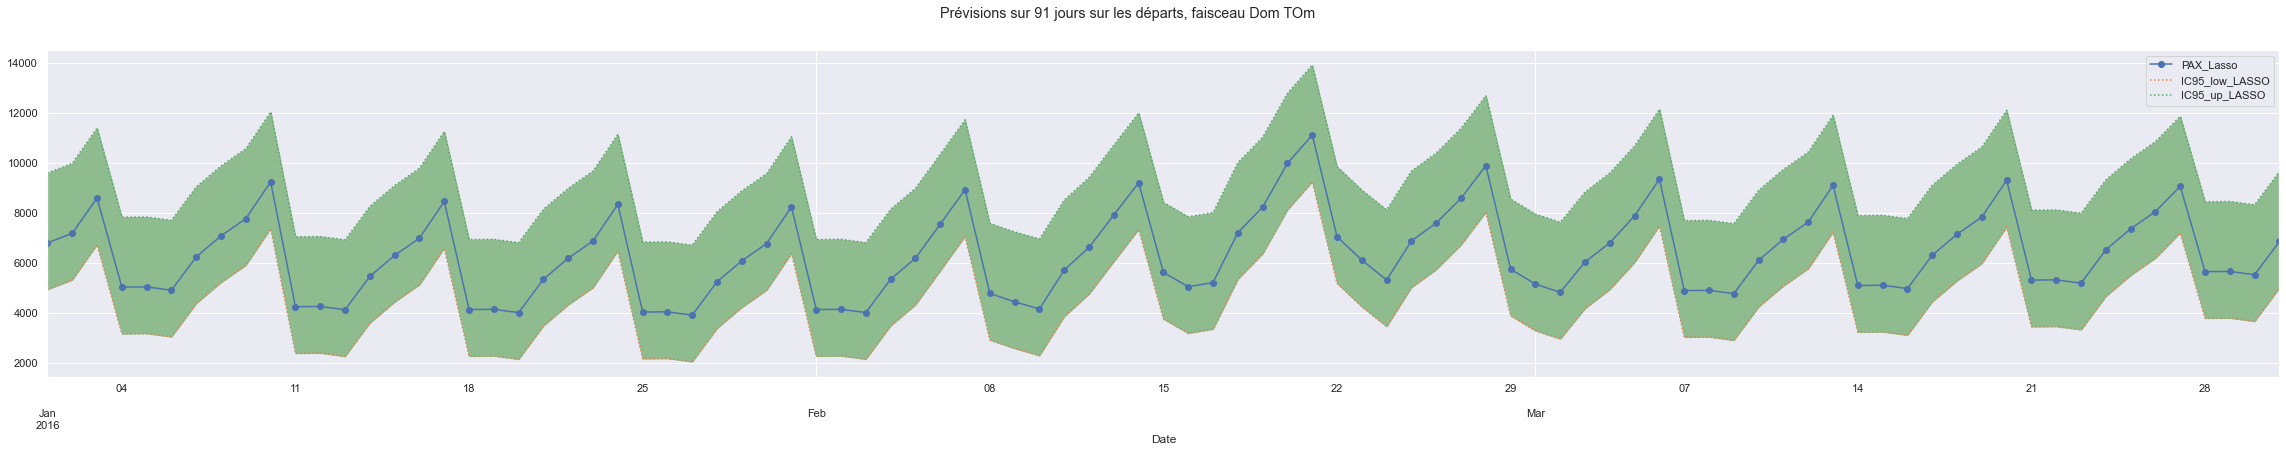

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(40,6))

prev = Prev_Lasso[Prev_Lasso['ArrDep']=="Départ"]
prev = prev[prev['Faisceau']=='International']
ax.fill_between(x=list(prev.index), y1=list(prev['IC95_up_LASSO']), y2=list(prev['IC95_low_LASSO']), color='darkseagreen', label='IC à 95%')

prev['PAX_Lasso'].plot(ax = ax,legend=True,style='o-')
prev['IC95_low_LASSO'].plot(ax=ax,legend=True,style=':')
prev['IC95_up_LASSO'].plot(ax=ax,legend=True,style=':')
plt.suptitle('Prévisions sur 91 jours sur les départs, faisceau Dom TOm')

In [57]:
Prev_Lasso.index

DatetimeIndex(['2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-02', '2016-01-02', '2016-01-02',
               '2016-01-02', '2016-01-02',
               ...
               '2016-03-30', '2016-03-30', '2016-03-30', '2016-03-30',
               '2016-03-30', '2016-03-31', '2016-03-31', '2016-03-31',
               '2016-03-31', '2016-03-31'],
              dtype='datetime64[ns]', name='Date', length=455, freq=None)

In [44]:
Prev_Lasso.to_csv("prevlasso.csv")